In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv("Global_Superstore(CSV).csv")

In [20]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [24]:
dataset.pivot_table(values='Discount', index='Profit',aggfunc='mean', margins=True)

,Discount
Profit,
-3059.82,0.50000
-3009.44,0.50000
-2750.28,0.70000
-2211.17,0.50000
-1806.24,0.60000
...,...
2817.99,0.00000
2939.31,0.00000
3979.08,0.00000


In [32]:
dataset.pivot_table(values='Quantity', index='Ship Mode')

,Quantity
Ship Mode,
First Class,4.876972
Same Day,5.415842
Second Class,6.029289
Standard Class,5.900875


In [50]:
pivot_table = pd.pivot_table(
    dataset,
    values='Profit',
    index='Quantity',
    columns='Discount',
    aggfunc='mean'
)

print("Profit rate by Quantity  and Discount :")
print(pivot_table)

# Add more pivot tables as needed
# Example: Average age of survivors based on class and gender
pivot_age = pd.pivot_table(
    dataset,
    values='Profit',
    index='Quantity',
    columns='Discount',
    aggfunc='mean'
)

print("\nAverage Profit of Product by Quantity and Discount :")
print(pivot_age)



Profit rate by Quantity  and Discount :
Discount        0.000    0.002        0.070       0.100       0.150  \
Quantity                                                              
1           91.499286      NaN          NaN         NaN         NaN   
2          158.177018      NaN   211.260000  146.664000   84.290000   
3          259.428857  195.350    46.920000  309.720000  143.523750   
4          414.611354  278.325          NaN  197.517500  330.345000   
5          456.907848  268.320          NaN  406.395455  152.673333   
6          508.746154      NaN   236.326667  315.679375   57.828000   
7          706.046909  260.605   709.940000  325.488333 -411.420000   
8          574.940976  646.315    43.960000  270.517500  466.480000   
9          629.916207  148.350   -58.965000  620.078462  376.544000   
10         581.391538   18.860   156.400000  559.350000         NaN   
11         951.566000      NaN  1554.430000  481.692500  133.520000   
12         446.622857      NaN       

In [56]:
dataset=pd.read_csv("Global_Superstore(CSV).csv")

<Figure size 1000x900 with 0 Axes>

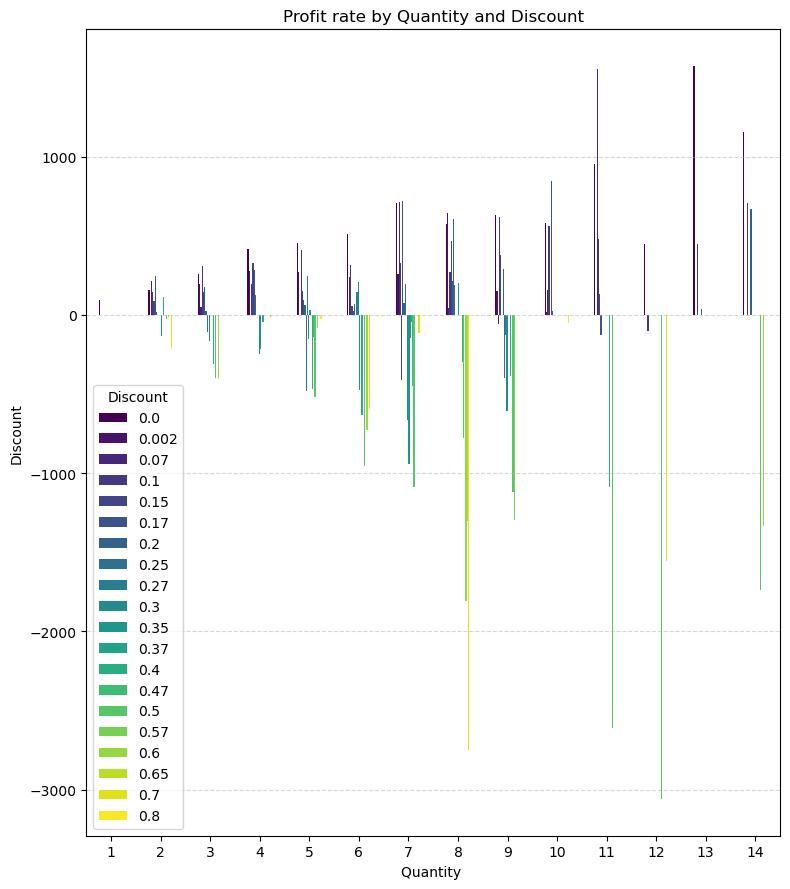

In [134]:
plt.figure(figsize=(10, 9))
pivot_table.plot(kind='bar', figsize=(8, 9), colormap='viridis')
plt.title('Profit rate by Quantity and Discount')
plt.xlabel('Quantity ')
plt.ylabel('Discount')
plt.xticks(rotation=0)
plt.legend(title='Discount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

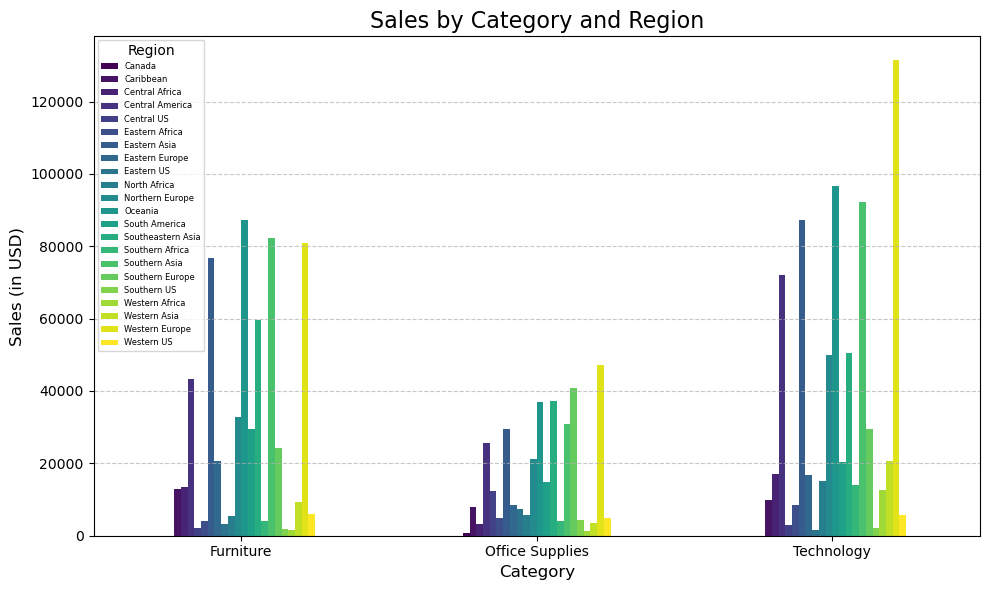

In [84]:
sales_by_category_region = pd.pivot_table(
    dataset, 
    values='Sales', 
    index='Category', 
    columns='Region', 
    aggfunc='sum'
)
sales_by_category_region.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Sales by Category and Region', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales (in USD)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Region', fontsize=6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

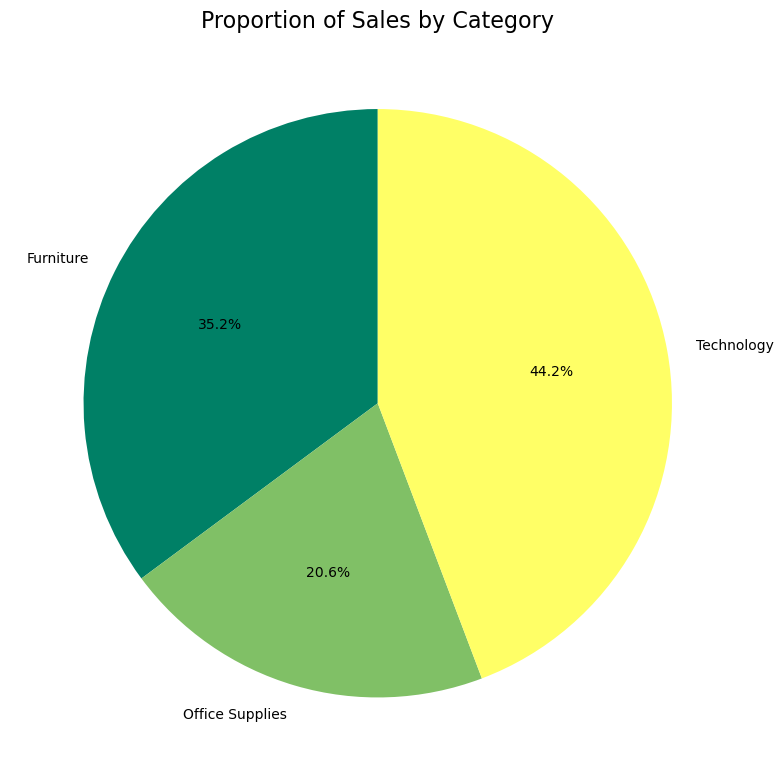

In [102]:
sales_proportion = dataset.groupby('Category')['Sales'].sum() / dataset['Sales'].sum()   #piechart

sales_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='summer', figsize=(8, 8))
plt.title('Proportion of Sales by Category', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

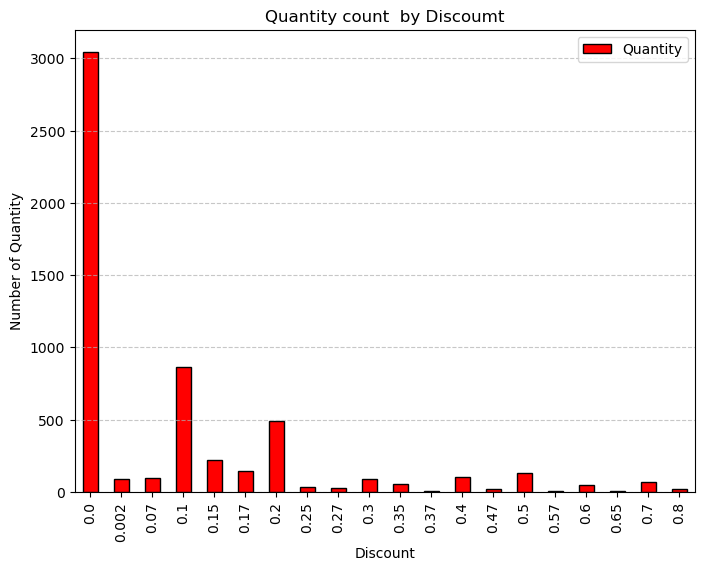

In [120]:
pivot_bar2 = dataset.pivot_table(values="Quantity", index="Discount", aggfunc="sum")              #heatmap
pivot_bar2.plot(kind="bar", color=["Red", "green"], edgecolor="black", figsize=(8, 6))
plt.title("Quantity count  by Discoumt")
plt.ylabel("Number of Quantity")
plt.xlabel("Discount")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

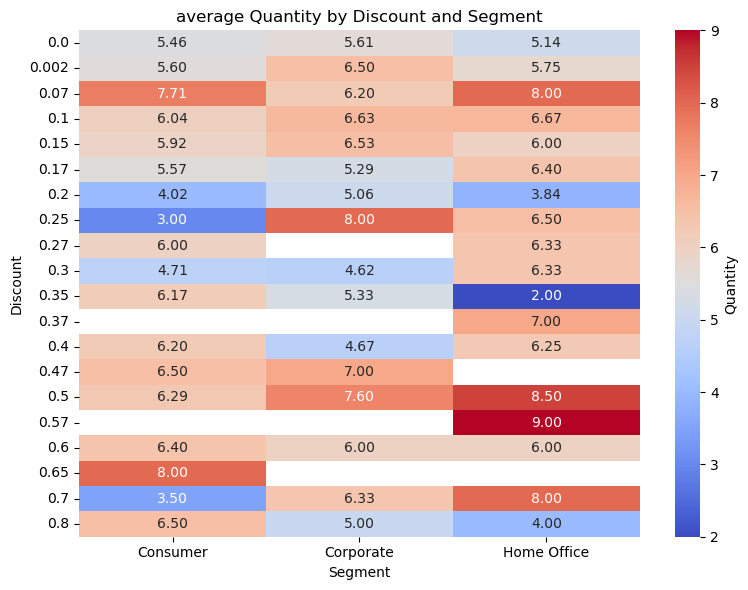

In [148]:
pivot_age = pd.pivot_table(
    dataset,
    values='Quantity',
    index='Discount',
    columns='Segment',
    aggfunc='mean'
)

# heatmap for average age
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_age, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Quantity'})
plt.title('average Quantity by Discount and Segment')
plt.xlabel('Segment')
plt.ylabel('Discount')
plt.tight_layout()
plt.show()